In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [3]:
seasons={}

In [4]:
for year in range(1979,2022):
    
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'.format(year)
    r = requests.get(url)
    r_html = r.text
    soup = BeautifulSoup(r_html,'html.parser')
    table=soup.find_all(class_="full_table")
    table=soup.find_all(class_="full_table")

    """ Extracting List of column names"""
    head=soup.find(class_="thead")
    column_names_raw=[head.text for item in head][0]
    column_names_polished=column_names_raw.replace("\n",",").split(",")[2:-1]
    print(column_names_polished)
    ['Player',
     'Pos',
     'Age',
     'Tm',
     'G',
     'GS',
     'MP',
     'FG',
     'FGA',
     'FG%',
     '3P',
     '3PA',
     '3P%',
     '2P',
     '2PA',
     '2P%',
     'eFG%',
     'FT',
     'FTA',
     'FT%',
     'ORB',
     'DRB',
     'TRB',
     'AST',
     'STL',
     'BLK',
     'TOV',
     'PF',
     'PTS']
    """Extracting full list of player_data"""
    players=[]

    for i in range(len(table)):

            player_=[]

            for td in table[i].find_all("td"):
                player_.append(td.text)

            players.append(player_)
    df=pd.DataFrame(players, columns=column_names_polished).set_index("Player")
    #cleaning the player's name from occasional special characters
    df.index=df.index.str.replace('*', '')
    seasons[year]=df


['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


<ipython-input-4-f06e5760fed5>:57: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.index=df.index.str.replace('*', '')


['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
['Player',

Scraping Career Playoff Win Share total. The HTML table is easily parsed by pandas and only requires minimal cleaning. The Win Share Percentage is a metric which originated in Baseball but has been translated for basketball. It is a measure for how much an individual contributed to his teams success which in this case is playoff success. The metric cannot be calculated with the available data we have. The table only has the top 250 players which may seem unfair, but if a player is to be considered the best of all, I would hope they would be in the top 250 for post season success.  You can read more about it and how it is calculated here:<br>
https://www.basketball-reference.com/about/ws.html

In [5]:
url = 'https://www.basketball-reference.com/leaders/ws_career_p.html#tot::2'
playoffs=pd.read_html(url)
playoffs=playoffs[0]
for index, row in playoffs.iterrows():
     playoffs.at[index, 'Player']= re.match(r'[A-Za-z+\s]+', row['Player'] )[0]
playoffs=playoffs.set_index("Player")
playoffs=playoffs.drop('Rank', axis =1)
playoffs



,WS
Player,
LeBron James,55.68
Michael Jordan,39.76
Tim Duncan,37.84
Kareem Abdul,35.56
Magic Johnson,32.63
...,...
Mario Chalmers,5.24
Antonio Daniels,5.19
Andrew Bynum,5.18


In [6]:
#cleaning the seasons data
#position, age, team and age have no usage to career totals
#all percentage values will be recalculated with new statistic totals
for year in seasons:
    seasons[year] =seasons[year].replace(np.NaN,0 )
    seasons[year] =seasons[year].replace('',0 )
    seasons[year]=seasons[year].drop('Pos', axis =1)
    seasons[year]=seasons[year].drop('Age', axis =1)
    seasons[year]=seasons[year].drop('FG%', axis =1)
    seasons[year]=seasons[year].drop('FT%', axis =1)
    seasons[year]=seasons[year].drop('eFG%', axis =1)
    seasons[year]=seasons[year].drop('2P%', axis =1)
    seasons[year]=seasons[year].drop('3P%', axis =1)
    seasons[year]=seasons[year].drop('Tm', axis =1)

NameError: name 'career_totals' is not defined

In [39]:
career_totals=seasons[1979]

print(career_totals)
for year in range(1980,2022):
    seasons[year] =seasons[year].replace(np.NaN,0 )
    seasons[year] =seasons[year].replace('',0 )
    career_totals =career_totals.replace(np.NaN,0 )
    career_totals =career_totals.replace('',0 )
    for col in career_totals.columns:
        career_totals[col] = career_totals[col].astype(int)
    for i, row in seasons[year].iterrows():
        if i != 'Chris Babb':
            if i in career_totals.index.values:

                career_totals.at[i, 'PTS']+=int(row['PTS'])
                career_totals.at[i,'G']=career_totals.loc[i]['G']+int(row['G'])
                career_totals.at[i,'GS']=career_totals.loc[i]['GS']+int(row['GS'])
                career_totals.at[i,'MP']=career_totals.loc[i]['MP']+int(row['MP'])
                career_totals.at[i,'FG']=career_totals.loc[i]['FG']+int(row['FG'])
                career_totals.at[i,'FGA']=career_totals.loc[i]['FGA']+int(row['FGA'])
                career_totals.at[i,'3P']=career_totals.loc[i]['3P']+int(row['3P'])
                career_totals.at[i,'3PA']=career_totals.loc[i]['3PA']+int(row['3PA'])
                career_totals.at[i,'2P']=int(row['2P'])+ career_totals.loc[i]['2P']
                career_totals.at[i,'2PA']=int(row['2PA'])+career_totals.loc[i]['2PA']
                career_totals.at[i,'FT']=career_totals.loc[i]['FT']+int(row['FT'])
                career_totals.at[i,'FTA']=career_totals.loc[i]['FTA']+int(row['FTA'])
                career_totals.at[i,'ORB']=career_totals.loc[i]['ORB']+int(row['ORB'])
                career_totals.at[i,'DRB']=career_totals.loc[i]['DRB']+int(row['DRB'])
                career_totals.at[i,'TRB']=career_totals.loc[i]['TRB']+int(row['TRB'])
                career_totals.at[i,'AST']=career_totals.loc[i]['AST']+int(row['AST'])
                career_totals.at[i,'TOV']=career_totals.loc[i]['TOV']+int(row['TOV'])
                career_totals.at[i,'STL']=career_totals.loc[i]['STL']+int(row['STL'])
                career_totals.at[i,'BLK']=career_totals.loc[i]['BLK']+int(row['BLK'])
                career_totals.at[i,'STL']=career_totals.loc[i]['PF']+int(row['PF'])

            else:

                 career_totals=career_totals.append(row)
        
    print(year)
    print(career_totals.shape)
career_totals['2P%']=career_totals['2P']/(career_totals['2PA'])
career_totals['3P%']=career_totals['3P']/((career_totals['3PA']))
career_totals['FT%']=career_totals['FT']/((career_totals['FTA']))
career_totals['FG%']=career_totals['FG']/((career_totals['FGA']))

career_totals['eFG%']=(career_totals['2P']+.5*career_totals['3P'])/(combined['FGA'])
career_totals=combined.merge(playoffs,how='left', on='Player')
combined

                      G GS    MP   FG   FGA  3P  3PA   2P   2PA   FT  FTA  \
Player                                                                      
Kareem Abdul-Jabbar  80  0  3157  777  1347   0    0  777  1347  349  474   
Tom Abernethy        70  0  1219  176   342   0    0  176   342   70   94   
Alvan Adams          77  0  2364  569  1073   0    0  569  1073  231  289   
Lucius Allen         31  0   413   69   174   0    0   69   174   19   33   
Kim Anderson         21  0   224   24    77   0    0   24    77   15   28   
...                  .. ..   ...  ...   ...  ..  ...  ...   ...  ...  ...   
Ray Williams         81  0  2370  575  1257   0    0  575  1257  251  313   
John Williamson      74  0  2451  635  1367   0    0  635  1367  373  437   
Rick Wilson          61  0   589   81   197   0    0   81   197   24   44   
Brian Winters        79  0  2575  662  1343   0    0  662  1343  237  277   
Larry Wright         73  0  1658  276   589   0    0  276   589  125  168   

TypeError: can only concatenate str (not "int") to str

In [41]:
career_totals=seasons[1979]

print(seasons[2014].loc['Chris Babb']['PTS'])
for i, row in seasons[2014].iterrows():
    
        print(i)
        for col in career_totals.columns:
            career_totals[col] = career_totals[col].astype(int)
        if i in career_totals.index.values:
                    career_totals.at[i, 'PTS']+=int(row['PTS'])
        else:

                     career_totals=career_totals.append(row)


22
Quincy Acy
Steven Adams
Jeff Adrien
Arron Afflalo
Alexis Ajinça
Cole Aldrich
LaMarcus Aldridge
Lavoy Allen
Ray Allen
Tony Allen
Al-Farouq Aminu
Lou Amundson
Chris Andersen
Alan Anderson
James Anderson
Ryan Anderson
Giannis Antetokounmpo
Carmelo Anthony
Joel Anthony
Pero Antić
Trevor Ariza
Hilton Armstrong
Darrell Arthur
Ömer Aşık
D.J. Augustin
Gustavo Ayón
Jeff Ayres
Chris Babb
Luke Babbitt
Leandro Barbosa
J.J. Barea
Andrea Bargnani
Harrison Barnes
Matt Barnes
Will Barton
Brandon Bass
Shane Battier
Nicolas Batum
Jerryd Bayless
Aron Baynes
Kent Bazemore
Bradley Beal
Michael Beasley
Marco Belinelli
Anthony Bennett
Patrick Beverley
Andris Biedriņš
Chauncey Billups
Bismack Biyombo
DeJuan Blair
Steve Blake
Andray Blatche
Eric Bledsoe
Vander Blue
Keith Bogans
Andrew Bogut
Matt Bonner
Trevor Booker
Carlos Boozer
Chris Bosh
Avery Bradley
Elton Brand
Corey Brewer
Ronnie Brewer
Aaron Brooks
MarShon Brooks
Lorenzo Brown
Shannon Brown
Kobe Bryant
Chase Budinger
Reggie Bullock
Trey Burke
Alec Bu

In [7]:
combined=seasons[1979].merge(seasons[1980],how='outer', on='Player')
combined.insert(3,'career_PTS', 0)
combined.insert(3,'career_FG', 0)
combined.insert(3,'career_G', 0)
combined.insert(3,'career_GS', 0)
combined.insert(3,'career_MP', 0)
combined.insert(3,'career_FGA', 0)

combined.insert(3,'career_2P', 0)
combined.insert(3,'career_2PA', 0)
combined.insert(3,'career_3P', 0)
combined.insert(3,'career_3PA', 0)
combined.insert(3,'career_FT', 0)
combined.insert(3,'career_FTA', 0)
combined.insert(3,'career_ORB', 0)
combined.insert(3,'career_DRB', 0)

combined.insert(3,'career_TRB', 0)
combined.insert(3,'career_AST', 0)
combined.insert(3,'career_STL', 0)
combined.insert(3,'career_BLK', 0)
combined.insert(3,'career_TOV', 0)
combined.insert(3,'career_PF', 0)
#do percent here
combined.insert(3,'career_FG%', 0)
combined.insert(3,'career_2P%', 0)
combined.insert(3,'career_3P%', 0)
combined.insert(3,'career_FT%', 0)
combined.insert(3,'career_eFG%', 0)
combined =combined.replace(np.NaN,0 )
combined =combined.replace('',0 )

for index, row in combined.iterrows():
    #print(int(row['PTS_x'])+int(row['PTS_y']))
    combined.at[index, 'career_FG']=int(row['FG_x'])+int(row['FG_y'])
    combined.at[index, 'career_PTS']= int(row['PTS_x'])+int(row['PTS_y'])
    combined.at[index, 'career_G']=int(row['G_x'])+int(row['G_y'])
    combined.at[index, 'career_GS']= int(row['GS_x'])+int(row['GS_y'])
    combined.at[index, 'career_MP']= int(row['MP_x'])+int(row['MP_y'])
    combined.at[index, 'career_FGA']= int(row['FGA_x'])+int(row['FGA_y'])
    
    combined.at[index, 'career_2P']=int(row['2P_x'])+int(row['2P_y'])
    combined.at[index, 'career_2PA']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_3P']=int(row['3P_x'])+int(row['3P_y'])
    combined.at[index, 'career_3PA']= int(row['3PA_x'])+int(row['3PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    combined.at[index, 'career_TRB']= int(row['TRB_x'])+int(row['TRB_y'])
    
    combined.at[index, 'career_TRB']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    
    combined.at[index, 'career_TRB']=int(row['TRB_x'])+int(row['TRB_y'])
    combined.at[index, 'career_AST']= int(row['AST_x'])+int(row['AST_y'])
    combined.at[index, 'career_STL']= int(row['STL_x'])+int(row['STL_y'])
    combined.at[index, 'career_BLK']= int(row['BLK_x'])+int(row['BLK_y'])
    
    combined.at[index, 'career_TOV']= int(row['TOV_x'])+int(row['TOV_y'])
    combined.at[index, 'career_PF']= int(row['PF_x'])+int(row['PF_y'])
    
   

combined=combined.drop('PTS_y', axis =1)
combined=combined.drop('FG_y', axis =1)
combined=combined.drop('PTS_x', axis =1)
combined=combined.drop('FG_x', axis =1)
combined=combined.drop('G_x', axis =1)
combined=combined.drop('G_y', axis =1)
combined=combined.drop('GS_x', axis =1)
combined=combined.drop('GS_y', axis =1)
combined=combined.drop('MP_x', axis =1)
combined=combined.drop('MP_y', axis =1)
combined=combined.drop('FGA_x', axis =1)
combined=combined.drop('FGA_y', axis =1)
combined=combined.drop('2P_x', axis =1)
combined=combined.drop('2P_y', axis =1)
combined=combined.drop('2PA_x', axis =1)
combined=combined.drop('2PA_y', axis =1)
combined=combined.drop('3P_x', axis =1)
combined=combined.drop('3P_y', axis =1)
combined=combined.drop('3PA_x', axis =1)
combined=combined.drop('3PA_y', axis =1)
combined=combined.drop('FT_x', axis =1)
combined=combined.drop('FT_y', axis =1)
combined=combined.drop('FTA_x', axis =1)
combined=combined.drop('FTA_y', axis =1)
combined=combined.drop('ORB_x', axis =1)
combined=combined.drop('ORB_y', axis =1)
combined=combined.drop('DRB_x', axis =1)
combined=combined.drop('DRB_y', axis =1)
combined=combined.drop('TRB_x', axis =1)
combined=combined.drop('TRB_y', axis =1)
combined=combined.drop('AST_x', axis =1)
combined=combined.drop('AST_y', axis =1)
combined=combined.drop('STL_x', axis =1)
combined=combined.drop('STL_y', axis =1)
combined=combined.drop('BLK_x', axis =1)
combined=combined.drop('BLK_y', axis =1)
combined=combined.drop('TOV_x', axis =1)
combined=combined.drop('TOV_y', axis =1)
combined=combined.drop('PF_x', axis =1)
combined=combined.drop('PF_y', axis =1)


#print(seasons[1997].loc['Michael Jordan'], combined.loc['Michael Jordan'])

In [8]:
for year in range(1981,2022):
  
    print(year)
    combined=combined.merge(seasons[year],how='outer', on='Player')
       
    combined =combined.replace(np.NaN,0 )
   
    for index, row in combined.iterrows():
        
        combined.at[index, 'career_FG']=int(row['career_FG'])+int(row['FG'])
        combined.at[index, 'career_PTS']= int(row['career_PTS'])+int(row['PTS'])
        combined.at[index, 'career_G']= int(row['career_G'])+int(row['G'])
        combined.at[index, 'career_GS']= int(row['career_GS'])+int(row['GS'])
        combined.at[index, 'career_MP']= int(row['career_MP'])+int(row['MP'])
        combined.at[index, 'career_FGA']= int(row['career_FGA'])+int(row['FGA'])
        
        combined.at[index, 'career_2P']=int(row['career_2P'])+int(row['2P'])
        combined.at[index, 'career_2PA']= int(row['career_2PA'])+int(row['2PA'])
        combined.at[index, 'career_3P']=int(row['career_3P'])+int(row['3P'])
        combined.at[index, 'career_3PA']= int(row['career_3PA'])+int(row['3PA'])
        combined.at[index, 'career_FT']= int(row['career_FT'])+int(row['FT'])
        combined.at[index, 'career_FTA']= int(row['career_FTA'])+int(row['FTA'])
        combined.at[index, 'career_ORB']= int(row['career_ORB'])+int(row['ORB'])
        combined.at[index, 'career_DRB']= int(row['career_DRB'])+int(row['DRB'])
        combined.at[index, 'career_BLK']= int(row['career_BLK'])+int(row['BLK'])
        
        combined.at[index, 'career_TRB']=int(row['career_TRB'])+int(row['TRB'])
        combined.at[index, 'career_STL']= int(row['career_STL'])+int(row['STL'])
        combined.at[index, 'career_AST']= int(row['career_AST'])+int(row['AST'])
        combined.at[index, 'career_TOV']= int(row['career_TOV'])+int(row['TOV'])
        combined.at[index, 'career_PF']= int(row['career_PF'])+int(row['PF'])

        #combined.at[index, 'career_2P%']= int(row['career_2P'])/(int(row['career_2PA']+1))
        #combined.at[index, 'career_3P%']= int(row['career_3P'])/(int(row['career_3PA']+1))
        
    #combined=combined.drop('PTS_y', axis =1)
    combined=combined.drop('PTS', axis =1)
    combined=combined.drop('FG', axis =1)
    combined=combined.drop('G', axis =1)
    combined=combined.drop('GS', axis =1)
    combined=combined.drop('MP', axis =1)
    combined=combined.drop('FGA', axis =1)
    
    combined=combined.drop('2P', axis =1)
    combined=combined.drop('2PA', axis =1)
    combined=combined.drop('3P', axis =1)
    combined=combined.drop('3PA', axis =1)
    combined=combined.drop('FT', axis =1)
    combined=combined.drop('FTA', axis =1)
    combined=combined.drop('ORB', axis =1)
    combined=combined.drop('DRB', axis =1)
    combined=combined.drop('TRB', axis =1)
    combined=combined.drop('AST', axis =1)
    combined=combined.drop('STL', axis =1)
    combined=combined.drop('BLK', axis =1)
    combined=combined.drop('TOV', axis =1)
    combined=combined.drop('PF', axis =1)
combined['career_2P%']=combined['career_2P']/(combined['career_2PA'])
combined['career_3P%']=combined['career_3P']/(combined['career_3PA'])
combined['career_FT%']=combined['career_FT']/(combined['career_FTA'])
combined['career_FG%']=combined['career_FG']/(combined['career_FGA'])

combined['career_eFG%']=(combined['career_2P']+.5*combined['career_3P'])/(combined['career_FGA'])

combined



1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,career_3PA,career_3P,career_2PA,career_2P,career_FGA,career_MP,career_GS,career_G,career_FG,career_PTS
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,0.572200,0.742593,0.055556,0.572952,0.572238,2488.0,2319.0,1910.0,660.0,2651.0,...,18.0,1.0,13036.0,7469.0,13054.0,28832.0,625.0,867.0,7470.0,18149.0
Tom Abernethy,0.492350,0.702020,0.000000,0.493724,0.492350,285.0,79.0,28.0,81.0,185.0,...,2.0,0.0,717.0,354.0,719.0,2739.0,0.0,176.0,354.0,847.0
Alvan Adams,0.507384,0.809458,0.133333,0.508199,0.507507,2438.0,1960.0,542.0,987.0,3015.0,...,15.0,2.0,8111.0,4122.0,8126.0,20355.0,342.0,766.0,4124.0,10013.0
Lucius Allen,0.396552,0.575758,NaN,0.396552,0.396552,52.0,30.0,6.0,21.0,44.0,...,0.0,0.0,174.0,69.0,174.0,413.0,0.0,31.0,69.0,157.0
Kim Anderson,0.311688,0.535714,NaN,0.311688,0.311688,42.0,22.0,5.0,4.0,15.0,...,0.0,0.0,77.0,24.0,77.0,224.0,0.0,21.0,24.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patrick Williams,0.431818,0.728000,0.391304,0.515385,0.482955,126.0,98.0,46.0,64.0,99.0,...,138.0,54.0,390.0,201.0,528.0,1983.0,71.0,71.0,255.0,655.0
Dylan Windler,0.338462,0.777778,0.337662,0.584906,0.438462,37.0,32.0,12.0,19.0,33.0,...,77.0,26.0,53.0,31.0,130.0,513.0,0.0,31.0,57.0,161.0
Cassius Winston,0.303030,0.833333,0.470588,0.375000,0.424242,8.0,5.0,1.0,2.0,12.0,...,17.0,8.0,16.0,6.0,33.0,98.0,0.0,22.0,14.0,41.0


Merging our playoff win share percentage with our career total table. As the playoff win share percentage only has the top 250, I chose a "left" merge so that  players of the career table are not eliminated if they do not rank, they only receive a np.NaN which is converted to a 0 in a later step. All other top 250 players now have their playoff win share total in addition to all their other career total stats.

In [46]:
#merge with win percentage
combined=combined.merge(playoffs,how='left', on='Player')
#combined=combined.drop('WS/48_x', axis =1)
#combined.rename(columns={"WS/48_x":"career_playoff_WS/48"})
combined

,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,career_FG,career_PTS,off_rating_2,off_rating_3,off_rating,overall_off_rating,off_rating_1,shoot_rating_1,overall_def_rating,WS
Player,,,,,,,,,,,,,,,,,,,,,
Hakeem Olajuwon,0.511481,0.711586,0.201613,0.513922,0.512077,4383.0,3667.0,3830.0,2162.0,3058.0,...,10749.0,26946.0,5599.709361,31222.8,29211.6,12.178967,29211.6,5.040323,27690.0,22.60
Tim Duncan,0.505065,0.696268,0.178571,0.508529,0.505803,3304.0,3381.0,3020.0,1025.0,4225.0,...,10285.0,26496.0,6274.505476,36149.8,31253.5,13.781788,31253.5,5.357143,23367.0,37.84
Kevin Garnett,0.492763,0.789499,0.275316,0.503706,0.496878,3561.0,3179.0,2037.0,1859.0,5445.0,...,10505.0,26071.0,6945.778427,39547.8,32208.5,14.990246,32208.5,47.905063,23141.0,16.42
Karl Malone,0.514517,0.742114,0.274194,0.519035,0.516139,4578.0,4524.0,1145.0,2085.0,5248.0,...,13528.0,36928.0,6638.687617,43124.4,39401.6,16.423060,39401.6,23.306452,21096.0,22.99
Patrick Ewing,0.503611,0.739750,0.149606,0.506460,0.504105,4035.0,3538.0,2895.0,1136.0,2217.0,...,9702.0,24818.0,3064.123066,22829.4,23478.9,7.858852,23478.9,2.842520,20949.0,14.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dillon Brooks,0.355496,0.789562,0.353266,0.457503,0.419646,798.0,386.0,74.0,224.0,458.0,...,1256.0,3365.0,454.846857,3517.0,3343.6,-0.441293,3343.6,135.654094,1442.0,NaN
Primož Brezec,0.497296,0.701149,0.166667,0.498521,0.497542,730.0,274.0,134.0,69.0,179.0,...,1012.0,2452.0,839.008876,3270.6,3060.3,-0.187533,3060.3,0.166667,1373.0,NaN
Trae Young,0.362040,0.861093,0.343469,0.488940,0.430744,355.0,858.0,35.0,190.0,1807.0,...,1558.0,4921.0,13.143522,8134.8,5686.9,0.196568,5686.9,170.704216,1342.0,NaN


Best Offensive Player<br><br>
This is a very complicated and difficult thing to measure. There are many facets to offense and it changes with the position of a player. Offense is not just a measure of individual points but how effectively a player can generate points for their team.<br><br>

My approach was to create 3 different offensive ratings which focus on a different aspect of the game. The best overall offensive player will be calculated based upon these 3 reatings.

Offensive Rating 1<br><br>
This is the simplest offensive formula and looks at career totals. Points are heavily weighted as the career point totals are signifigantly higher than other categories(could prove here). Assists and offensive rebounds are also weighted as positives and turnovers are rated negatively as they show an offensive mistake.

<BarContainer object of 1 artists>

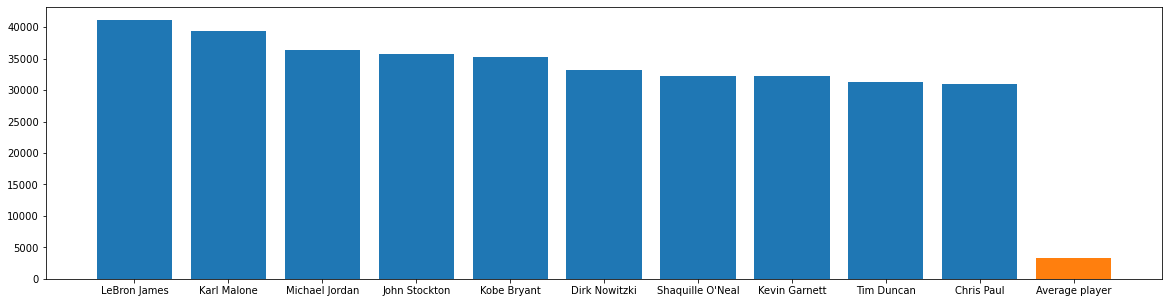

In [23]:
#Offensive weighting

#looking at overall totals
combined['off_rating_1']= (combined['career_PTS']+1.7*combined['career_AST']-3*combined['career_TOV']+2*combined['career_ORB'])

combined.sort_values(by=['off_rating_1'], inplace=True, ascending=False)
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating_1'])
plt.bar(['Average player'], [combined['career_PTS'].mean()])


Offensive Rating 2<br><br>
This rating is for scoring efficiency. Missing a shot in basketball is usually rebounded by the other team(could show stats) and can almost be thought of as a turnover. This is why shots from the field (career_3P and career 2P) are only considered in relation to the respective shooting percentage. This has the added effect of emphasizing the "Big" positions known as Center or guards as they often shoot close to the basket for high percentage shots.

Player
Shaquille O'Neal     8999.879199
Michael Jordan       8129.272536
Dirk Nowitzki        7186.098107
Kevin Garnett        6945.778427
LaMarcus Aldridge    6945.087215
Alex English         6936.794389
LeBron James         6671.504377
Karl Malone          6638.687617
Horace Grant         6402.925750
Tim Duncan           6274.505476
Name: off_rating_2, dtype: float64


<BarContainer object of 1 artists>

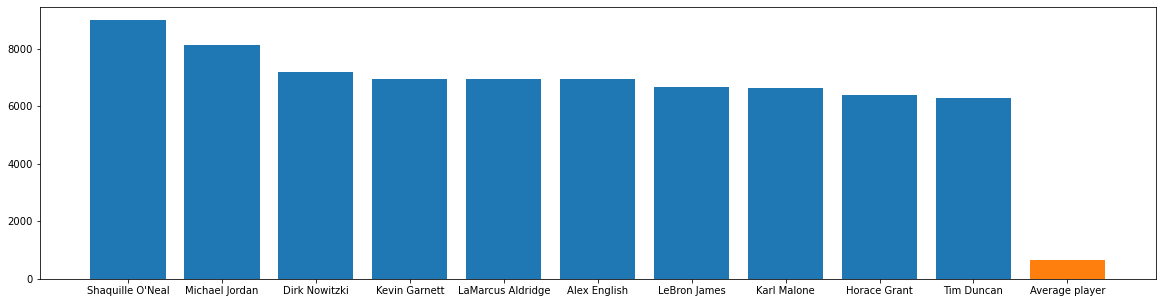

In [9]:
combined['off_rating_2']= ((2*combined['career_2P']*combined['career_2P%'])+(3*combined['career_3P']*combined['career_3P%'])
                           +.5*combined['career_AST']-3*combined['career_TOV']+combined['career_ORB'])
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)
print(combined[0:10]['off_rating_2'])
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating_2'])
plt.bar(['Average player'], [combined['off_rating_2'].mean()])



Offense Rating 3<br><br>
This rating is more focused on running the offense effectively. An assist is given to the player who passes to a player who scores, meaning the passer has indirectly created points. The increased weights for Assists, Offensive Rebounds, and greater penalty for turnovers emphasize important parts of offense other than total points. This rating is more weighted to "Guards" who often are smaller and are the fascilitators of the offense.

Player
John Stockton     3807.840558
LeBron James      6671.504377
Jason Kidd        1516.792300
Chris Paul        5271.267362
Magic Johnson     2818.863863
Gary Payton       5449.845928
Steve Nash        2340.078345
Karl Malone       6638.687617
Mark Jackson      1581.743435
Michael Jordan    8129.272536
Name: off_rating_2, dtype: float64


<BarContainer object of 1 artists>

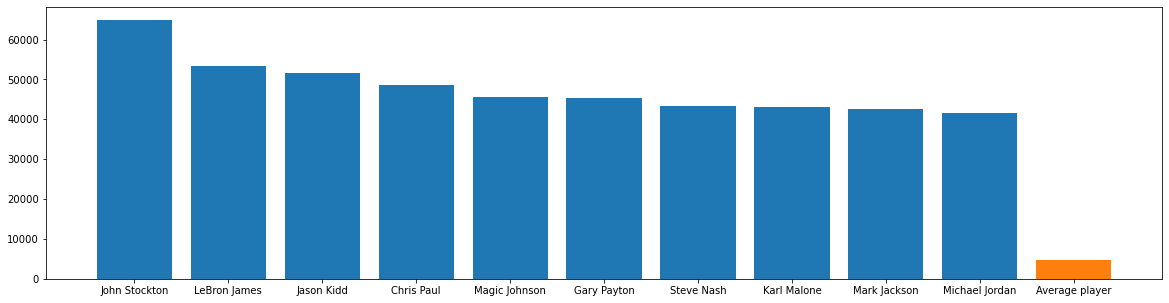

In [11]:
#emphasizing team play and looking at games played
combined['off_rating_3']=(.8*combined['career_PTS']+4*combined['career_AST']
                          -4*combined['career_TOV']+3*combined['career_ORB'])

combined.sort_values(by=['off_rating_3'], inplace=True, ascending=False)
print(combined[0:10]['off_rating_2'])
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating_3'])
plt.bar(['Average player'], [combined['off_rating_3'].mean()])


Overall Offensive Rating<br><br>
The total offensive rating is a product of the three previous offensive ratings. It is calculated by summing the z-score of each rating. This way players who dominate one category like John Stockton get an appropriate amount of credit. He is considered to be one of the best point guards of all time which matches his dominating performance in the offensive rating 3, but he falters in offensvie rating 2 which is moreso weighted towards bigger and taller centers. The z-scores best standardize the different categories.

In [24]:

#final is combination of ratings
combined['overall_off_rating']= ((combined['off_rating_1']-combined['off_rating_1'].mean())/combined['off_rating_1'].std()+
                                 (combined['off_rating_2']-combined['off_rating_2'].mean())/combined['off_rating_2'].std()+
                                 (combined['off_rating_3']-combined['off_rating_3'].mean())/combined['off_rating_3'].std()
                                )


The following scatter plots display the importance of the different offensive categories. It shows how the best scorers do well in each category(the combined color being a yellowy brown) but the different offensive weights to showcase the different offensive roles. Players who do well in offensive rating 3(which emphasizes smaller guards) do not necessarily stand out in the second scatter plot showing efficiency vs pts(offensive rating 2)and vice versa.

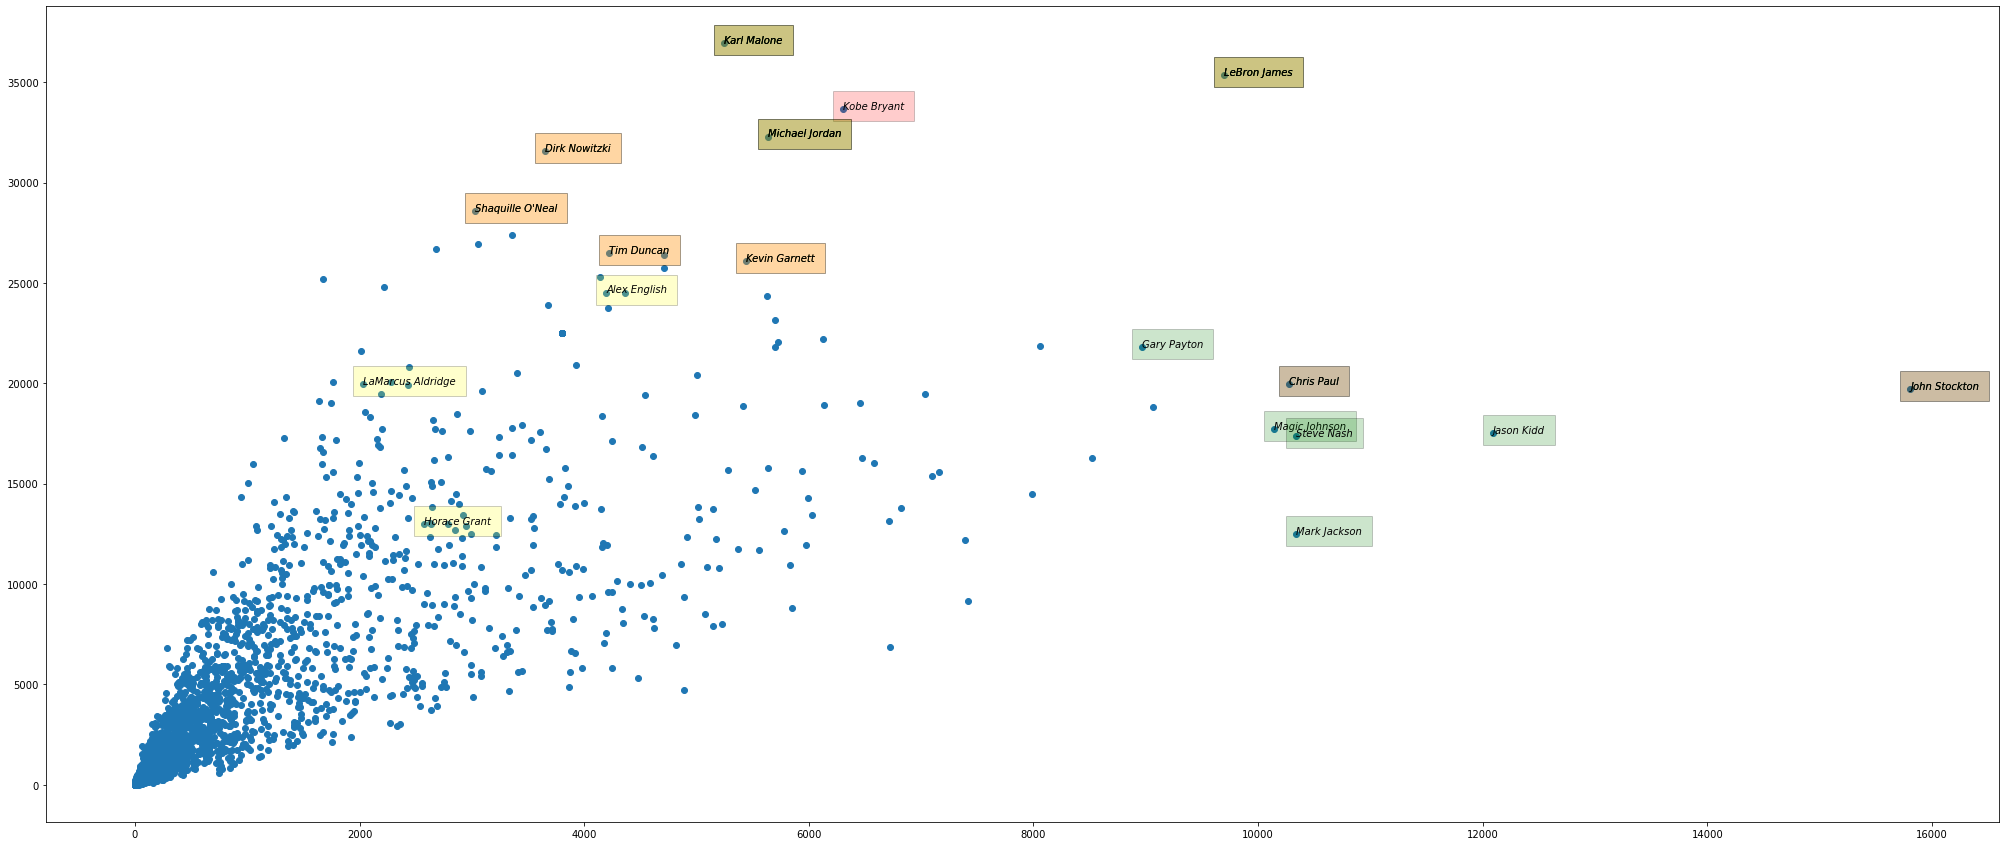

In [32]:
fig, ax = plt.subplots(figsize=(35,15))

combined.sort_values(by=['off_rating_1'], inplace=True, ascending=False)
plt.scatter(combined['career_AST'], combined['career_PTS'])
for name in combined[0:10].index:
    x= combined.loc[name]['career_AST']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
    
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)
for name in combined[0:10].index:
    x= combined.loc[name]['career_AST']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'yellow', 'alpha': 0.2, 'pad': 10}) 

combined.sort_values(by=['off_rating_3'], inplace=True, ascending=False)
for name in combined[0:10].index:
    x= combined.loc[name]['career_AST']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'green', 'alpha': 0.2, 'pad': 10}) 

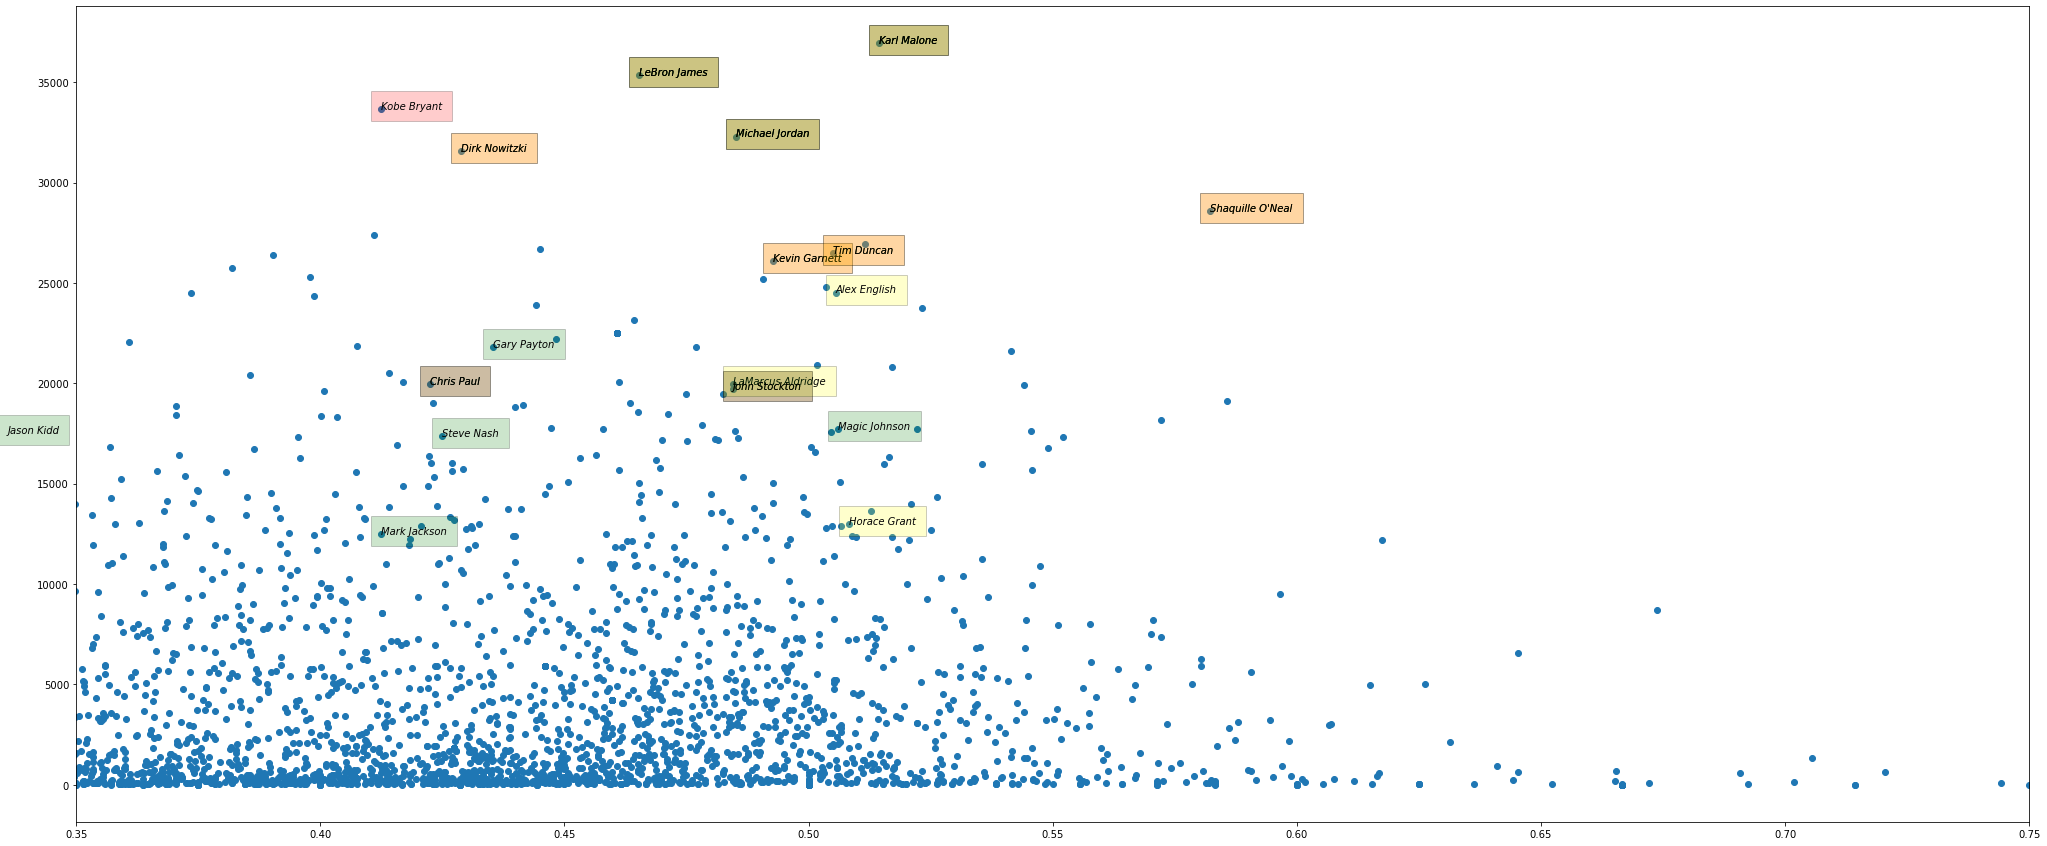

In [35]:
fig, ax = plt.subplots(figsize=(35,15))

combined.sort_values(by=['off_rating_1'], inplace=True, ascending=False)
plt.scatter(combined['career_eFG%'], combined['career_PTS'])
plt.xlim([.35, .75])

for name in combined[0:10].index:
    x= combined.loc[name]['career_eFG%']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})
    
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)
for name in combined[0:10].index:
    x= combined.loc[name]['career_eFG%']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'yellow', 'alpha': 0.2, 'pad': 10}) 

combined.sort_values(by=['off_rating_3'], inplace=True, ascending=False)
for name in combined[0:10].index:
    x= combined.loc[name]['career_eFG%']
    y= combined.loc[name]['career_PTS']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'green', 'alpha': 0.2, 'pad': 10}) 

From these scatter plots it is clear the best 3 scorers are Michael Jordan, Karl Malone, and LeBron James who excel in each category. They set themselves apart as high but efficient scorers while running their team's offense. 

<BarContainer object of 1 artists>

<Figure size 1440x360 with 0 Axes>

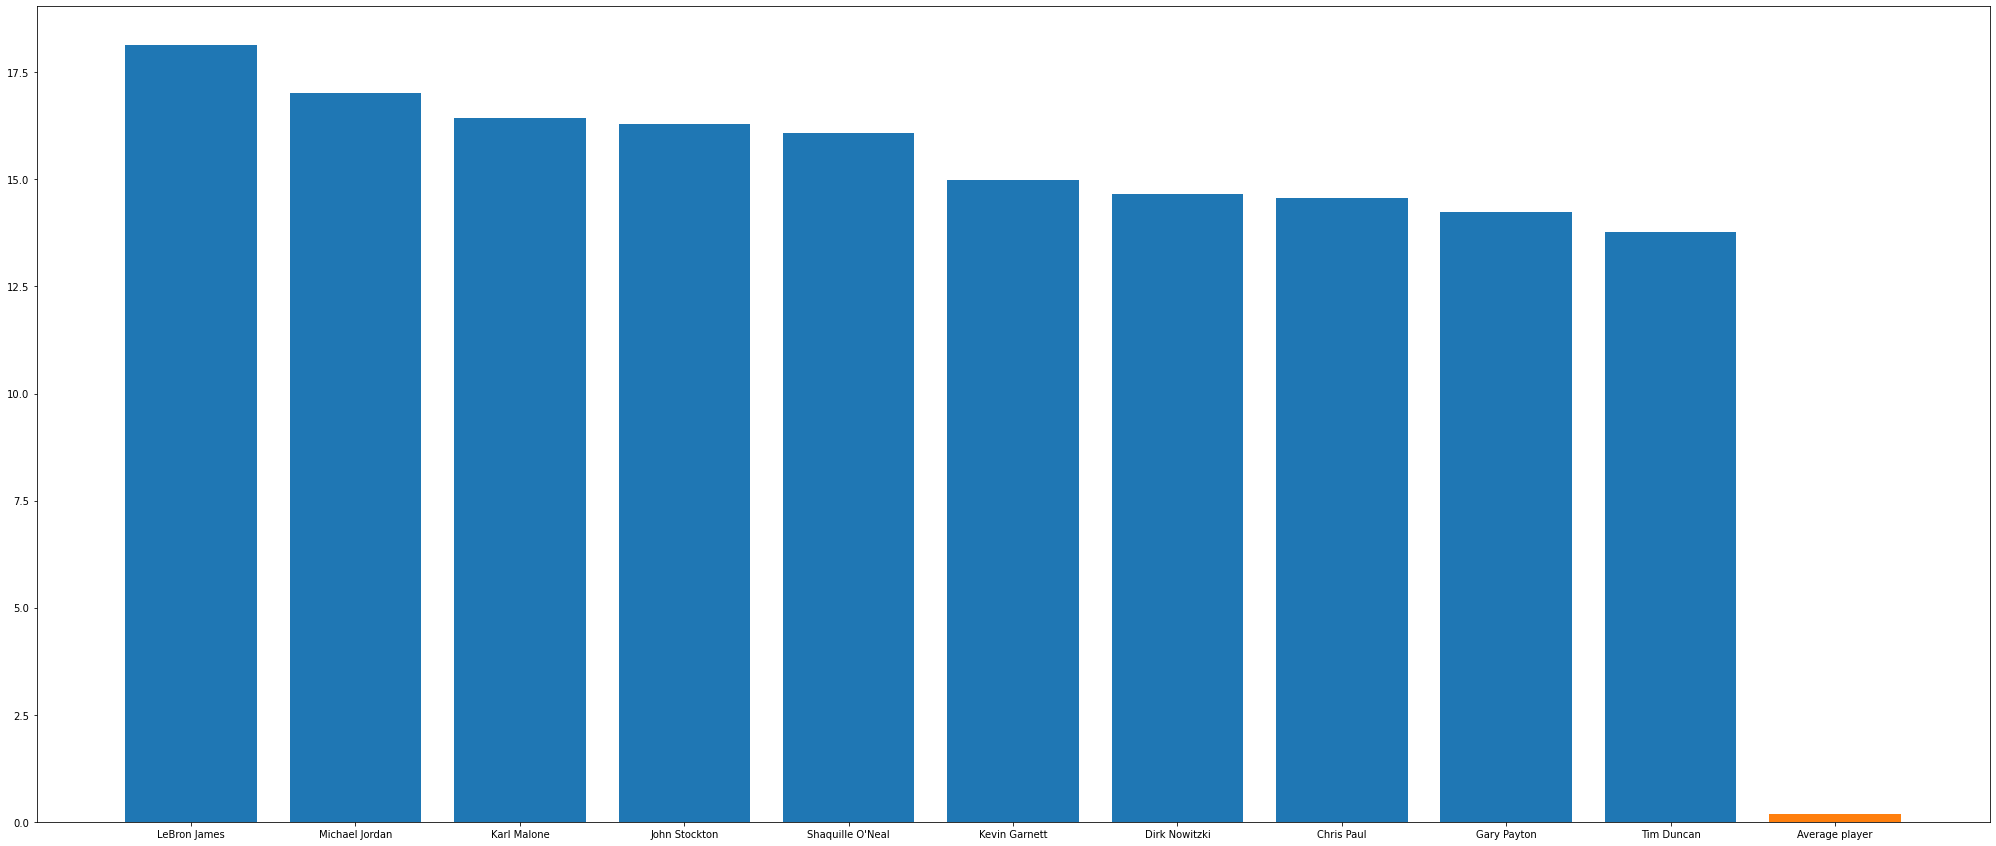

In [34]:

plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_off_rating'], inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(35,15))
plt.bar(combined[0:10].index, combined[0:10]['overall_off_rating'])


plt.bar(['Average player'], [combined['overall_off_rating'].mean()])


#for name in combined[0:10].index:
 #   image = plt.imread('{}.jpeg'.format(name))
  #  imBox=OffsetImage(image, zoom=.15)
   # ab=AnnotationBbox(imBox,[name,5])
    #ax.add_artist(ab)
    #plt.figure(figsize=(1, 10))
    


John Stockton
LeBron James
Jason Kidd
Chris Paul
Magic Johnson
Gary Payton
Steve Nash
Karl Malone
Mark Jackson
Michael Jordan
Shaquille O'Neal
Michael Jordan
Dirk Nowitzki
Kevin Garnett
LaMarcus Aldridge
Alex English
LeBron James
Karl Malone
Horace Grant
Tim Duncan


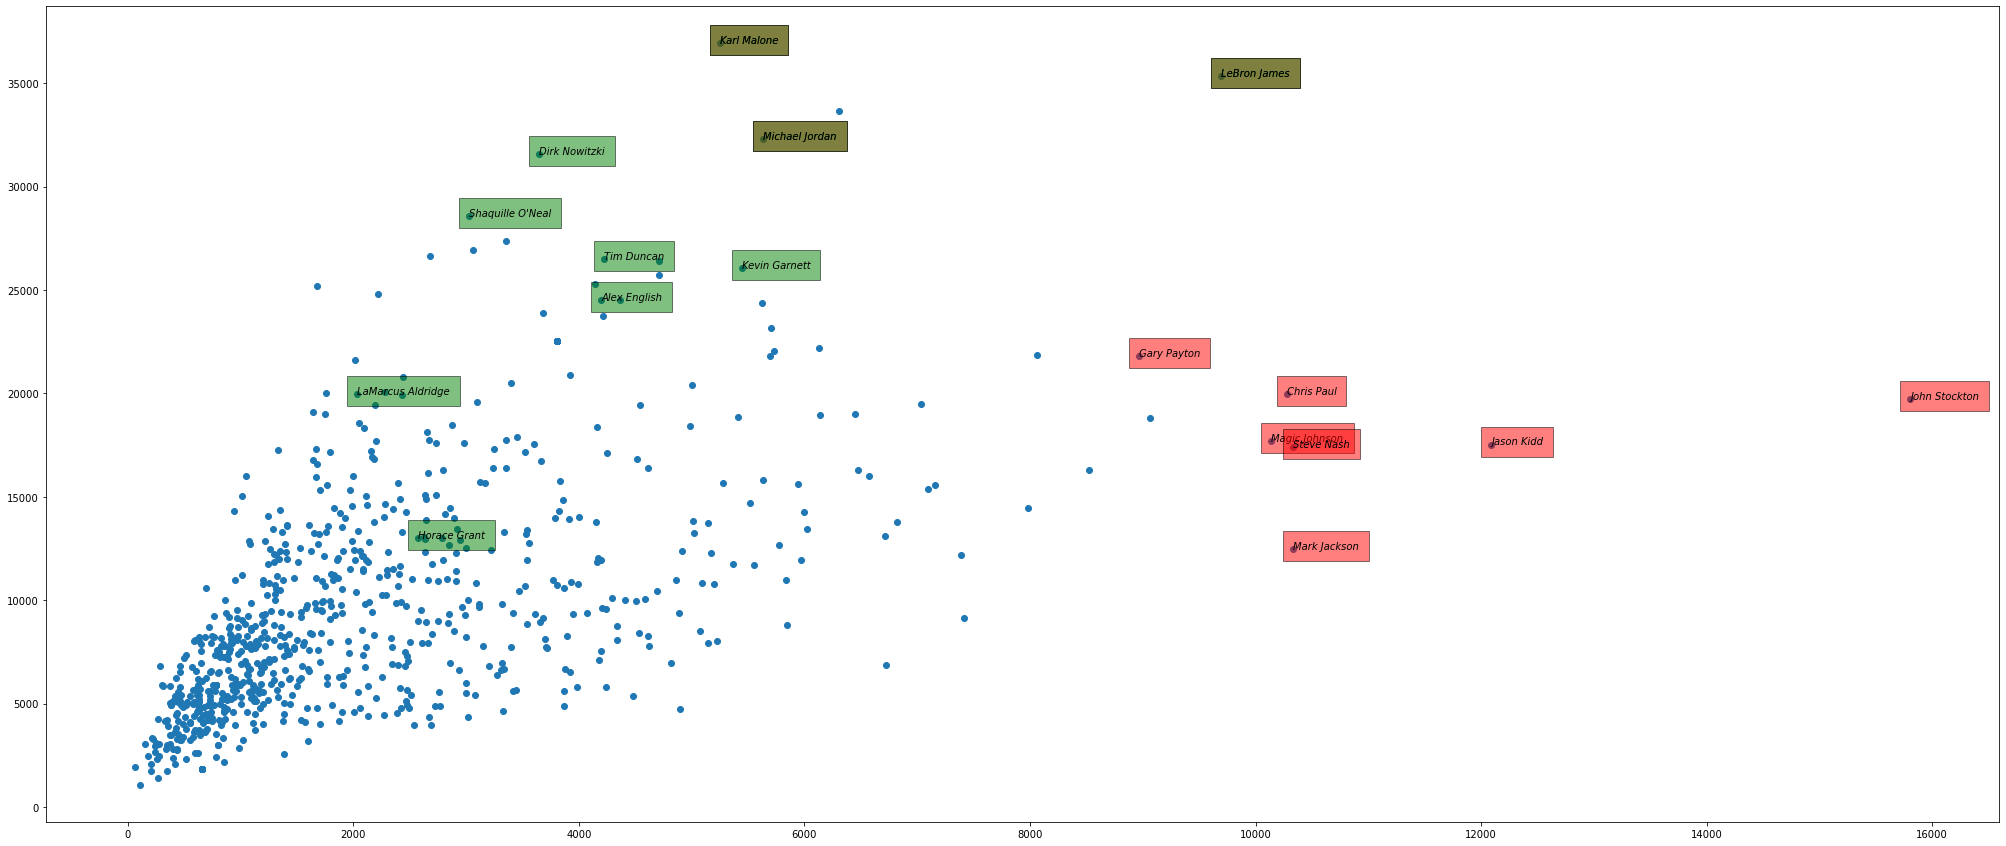

Best 3 Point Shooter<br><br>
While we did our best to emphasize different parts of the game, we felt that 3 point shooting was important enough to deserve its own analysis and award. The best 3 Point shooter is one who shoots many 3 pointers but also with a high completage rate. While this may seem similar to offensive rating 2, 3 pointers by the nature are lower percentage shots. The scatter plot below shows the normal percentage being <40% whereas shooters in the paint are much higher(Shaquille's O'Neal's shooting percentage). Therefore 3 point shooters were not overshadowed by the dominant centers of the league. This analysis is much simpler and solely focused on shoting percentage and career 3 pointers made. To be considered great you must have both, making a lot of 3 pointers off of many shots means equally little as making one 3 pointer on one attempt every game. 

Stephen Curry
Ray Allen
Kyle Korver
Reggie Miller
James Harden
Jason Terry
Vince Carter
J.J. Redick
Paul Pierce
Jamal Crawford


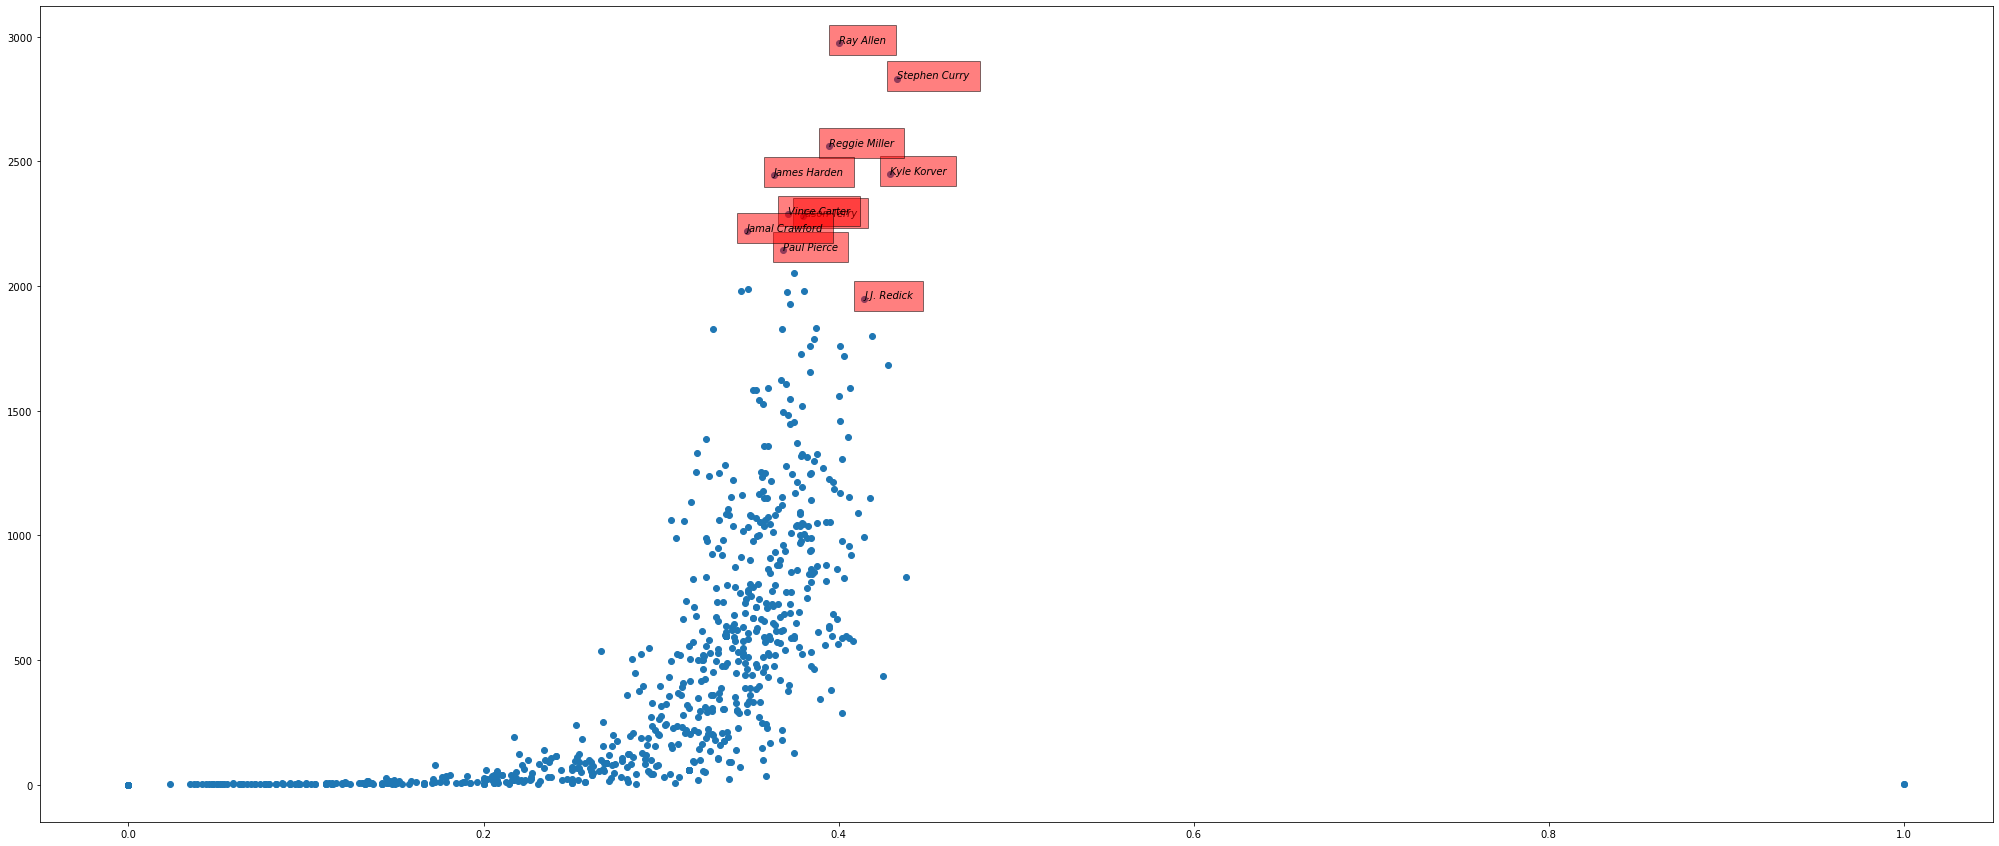

In [40]:
#some players have abnormally high 3 point percentages because they only played a few games and 
#went 1/2 on three pointers. To be considered a great 3 point shooter then they should have played over 200 games

combined= combined[combined['career_G']>200]
combined['shoot_rating_1']= (combined['career_3P%']*combined['career_3P'])
combined.sort_values(by=['shoot_rating_1'], inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(35,15))
plt.scatter(combined['career_3P%'], combined['career_3P'])
for name in combined[0:10].index:
    print(name)
    x= combined.loc[name]['career_3P%']
    y= combined.loc[name]['career_3P']
    ax.text(x, y, name , style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


It is clearly a battle between Stephen Curry and Ray Allen. Unfortunatley this data is not updated for the newest season as Stephen Curry just recently passed Ray Allen for most 3 pointers made in NBA history. In the meantime  for this data analysis, will Ray Allen's higher 3 Point total overcome Stephen Curry's higher 3 Point percentage?

<BarContainer object of 1 artists>

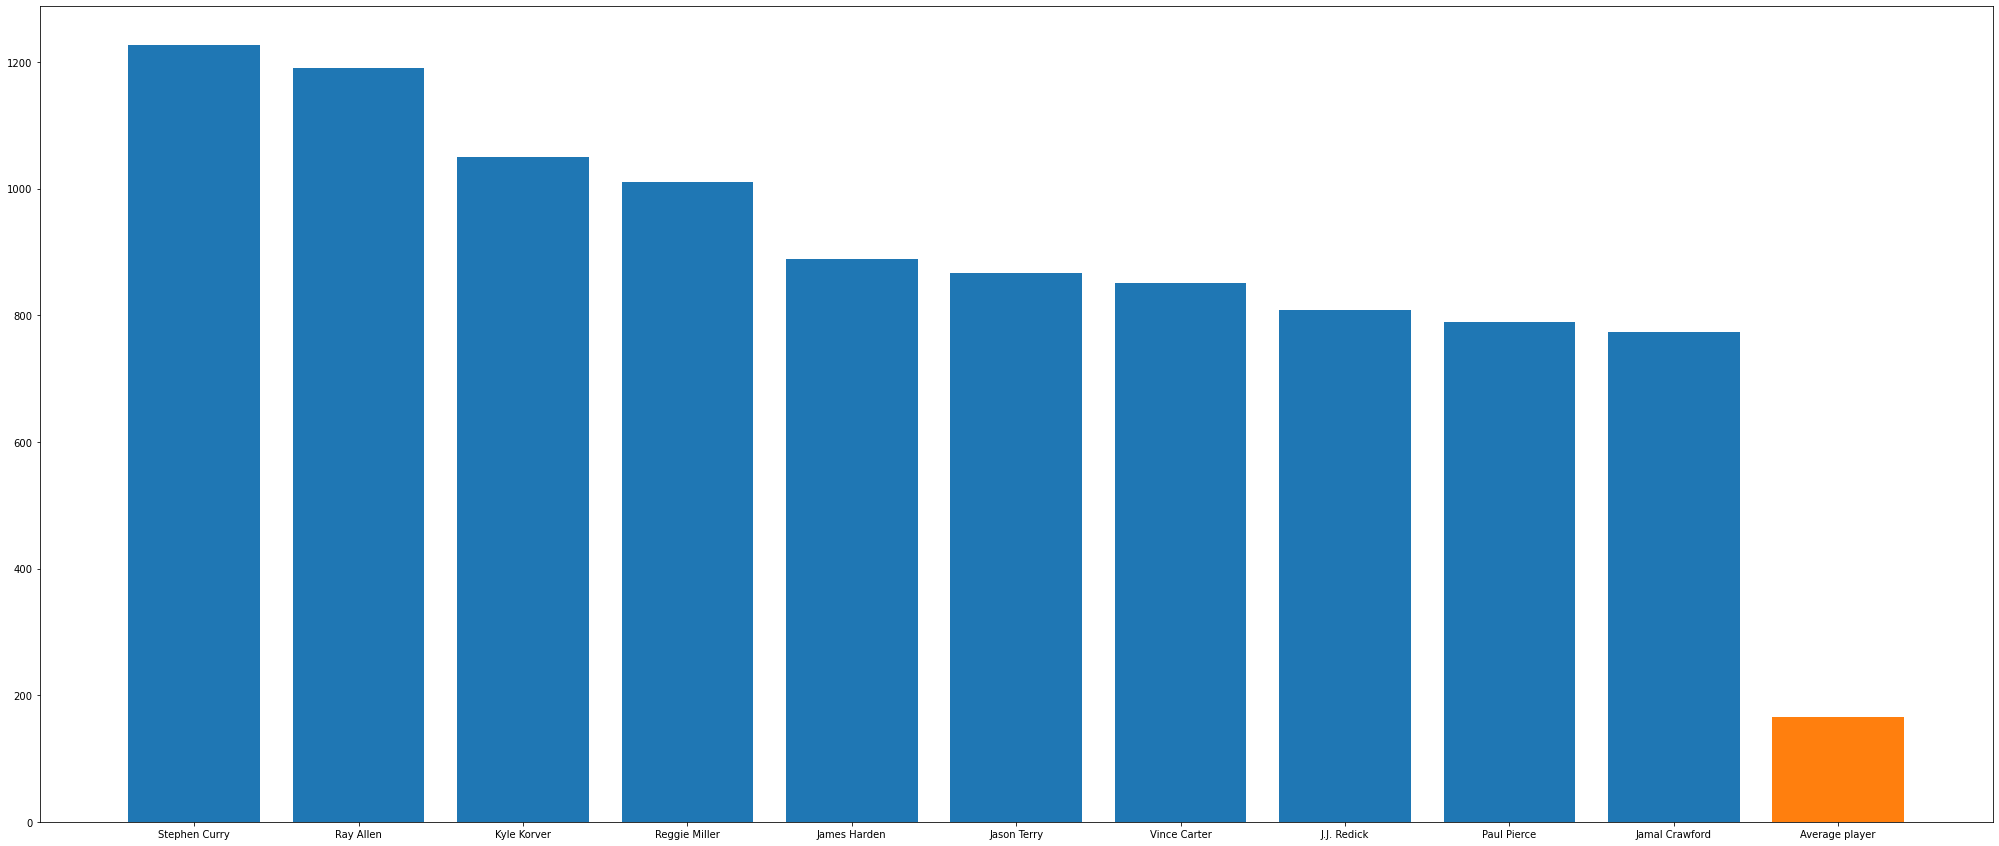

In [39]:
fig, ax = plt.subplots(figsize=(35,15))
plt.bar(combined[0:10].index, combined[0:10]['shoot_rating_1'])
plt.bar(['Average player'], [combined['shoot_rating_1'].mean()])

#plt.scatter(combined['career_3P%'],combined['career_3P'])
#for name in combined[0:10].index:
 #   image = plt.imread('{}.jpeg'.format(name))
  #  imBox=OffsetImage(image, zoom=.15)
   # ab=AnnotationBbox(imBox,[name,5])
    #ax.add_artist(ab)
    #plt.figure(figsize=(1, 10))

Defensive Rating <br><br>
It is no secret that the NBA is an offensive game. The freqent scoring and high point totals prove that beyond a doubt. As such defense rating is a much simpler calculation. Recently there have been more technical defensive ratings but as they are not implemented for older seasons we thought it best to base our rating on the classic defensive stats: blocks, steals, and rebounds. Blocks and steals are weighted more heavily as they often lead to a fast break and mean more in a game. Generally defensive rebounds are higher and often mean that the opposing team just missed their shot. However they are still an important stat and showcase the ability of a player to be in the right place for a rebound, fighting out the offensive players for the ball. 

<BarContainer object of 1 artists>

<Figure size 1440x360 with 0 Axes>

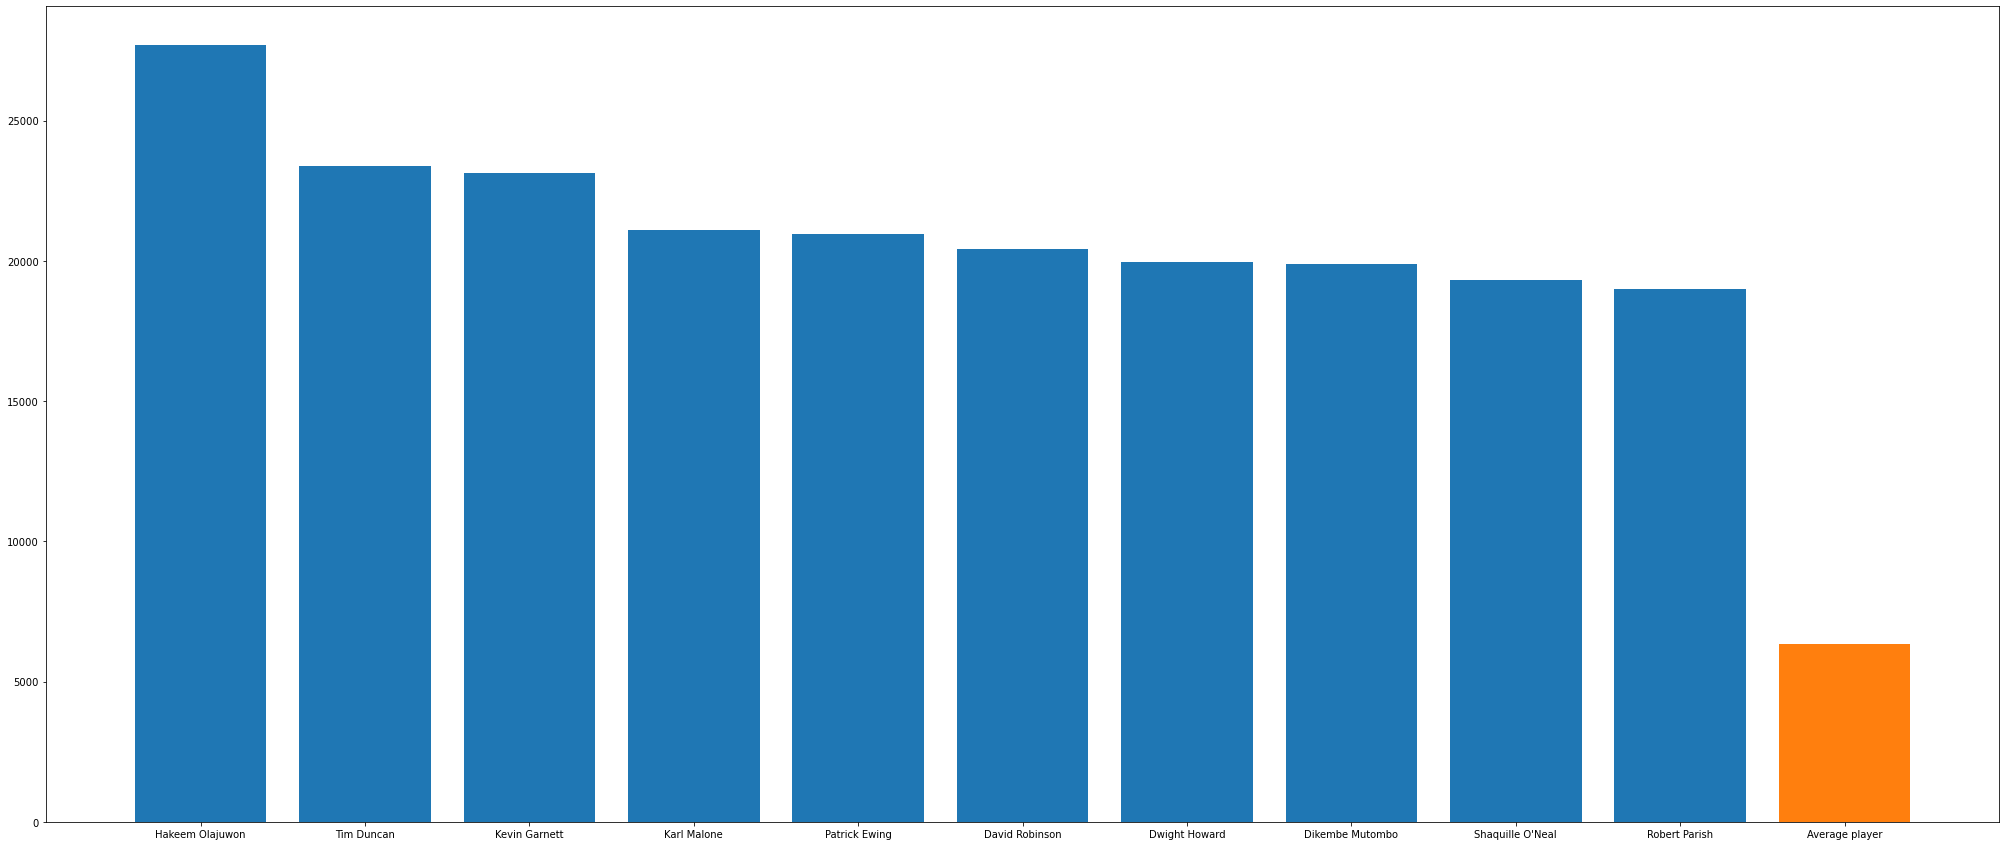

In [44]:
#Defensive weighting

#looking at overall totals
combined['overall_def_rating']= (3*combined['career_BLK']+3*combined['career_STL']+combined['career_DRB'])



plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_def_rating'], inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(35,15))
plt.bar(combined[0:10].index, combined[0:10]['overall_def_rating'])

plt.bar(['Average player'], [combined['overall_def_rating'].mean()])
#for name in combined[0:10].index:
 #   image = plt.imread('{}.jpeg'.format(name))
  #  imBox=OffsetImage(image, zoom=.15)
   # ab=AnnotationBbox(imBox,[name,5])
    #ax.add_artist(ab)
    #plt.figure(figsize=(1, 10))


There is a clear tilt towards centers as defensive players which is consistent with the relaity of the NBA. The large, intimidating centers dominae the defensive statline but also are vital in modern NBA defenses.

Overall Rating aka the GOAT Questions<br><br>

The GOAT question is based on both offensive and defensive performance however heavily weighted towards the offense as the NBA is offens based. It also relies on the z-scores of those to best determine the GOAT question for similar reasons to the overall offensive question.
<br><br><br>
"Say you were standing with one foot in the oven and one foot in an ice bucket. According to the percentage people, you should be perfectly comfortable." - Manager Bobby Bragan<br><br>
"If you dwell on statistics, you get shortsighted. If you aim for consistency, the numbers will be there at the end." - Pitcher Tom Seaver
<br><br>
These quotes put to words the unease I had in these stat calculations. Stats cannot differentiate the 2 pointer which one the game of the 2 pointer during garbage time. Michael Jordan's flu game is legendary but is just another game in the score book. Success in basketball is not just numbers and totals. Any good player can pump their stats by being the best on a miserable team scoring constantly. I knew the GOAT question needed some additional attempt to incorporate this feeling or "greatness factor" into the calculation.<br><br>

I settled on adding the Career Total Playoff Wind share. It was discussed earlier in this notebook and is a complex equation I will not bore you with. However the crux of the stat is how much a player contributed to a team's playoff win. This is the best way to account for great players who lead their teams through tough competition in the post season. The greatest players have great stats but they also generate important wins. According to my calcualtions the NBA GOAT from 1980-present is...

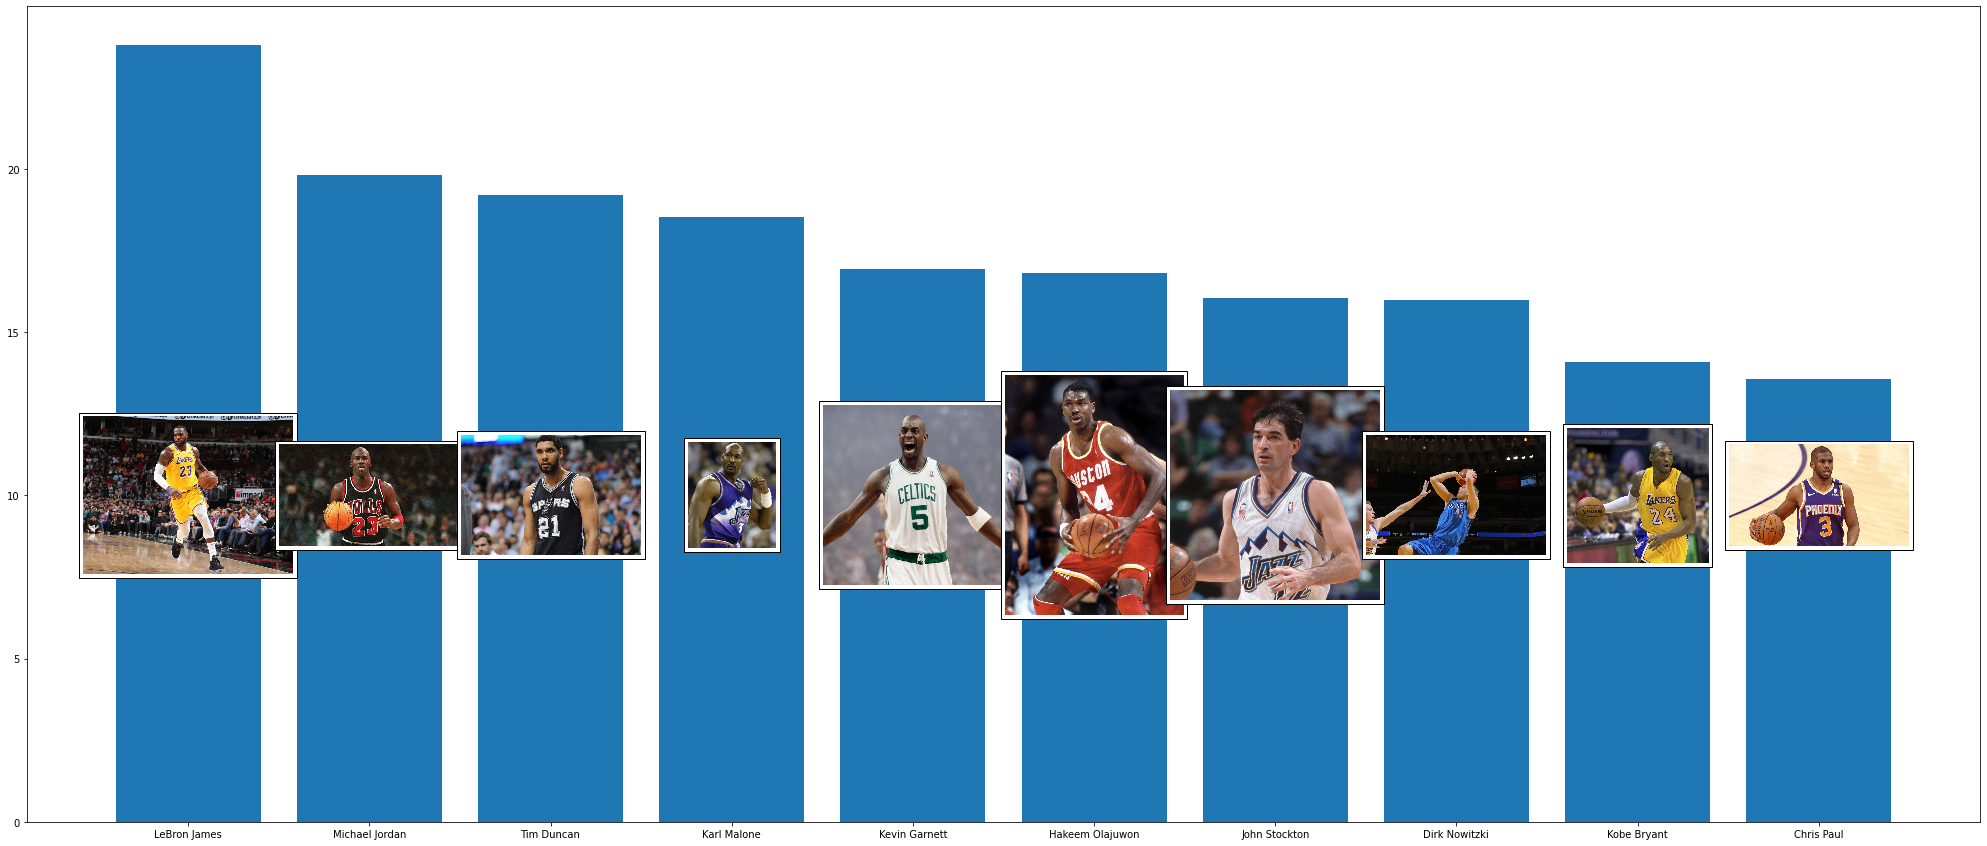

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

<Figure size 72x720 with 0 Axes>

In [51]:
combined['overall_rating']= ((combined['overall_def_rating']-combined['overall_def_rating'].mean())/combined['overall_def_rating'].std()+
                                 3*(combined['overall_off_rating']-combined['overall_off_rating'].mean())/combined['overall_off_rating'].std()
                             +.15*combined['WS']
                            )


fig, ax = plt.subplots(figsize=(35,15))

combined.sort_values(by=['overall_rating'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['overall_rating'])


for name in combined[0:10].index:
    image = plt.imread('{}.jpeg'.format(name))
    imBox=OffsetImage(image, zoom=.15)
    ab=AnnotationBbox(imBox,[name,10])
    ax.add_artist(ab)
    plt.figure(figsize=(1, 10))
    


Lebron James!<br><br>
It was never a question of the top 2 between Michael Jordan and LeBron James. In the stats world, LeBron James' longevity and contiiued dominance has pushed his stats above Jordans and Lebron James' total playoff wins are ridiculous. Lebron James often times singelhandedly dragged his team through the post season which is how he gained the edge on Jordan.